In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Directorio de los archivos .xlsx
directorio = "/home/daniufundar/Documents/Fundar/proyecto_pesca/data/Desembarques/"

# Inicializar un DataFrame vacío para almacenar los datos
datos_desembarques = pd.DataFrame(columns=['Año', 'Total'])

years = np.arange(1989, 2023, 1)

# Leer archivos .xlsx en el directorio
for iyear in years:
    archivo_xls = os.path.join(directorio, f"{iyear}.xls")
    archivo_xlsx = os.path.join(directorio, f"{iyear}.xlsx")

    if os.path.exists(archivo_xls):
        ruta_archivo = archivo_xls
    elif os.path.exists(archivo_xlsx):
        ruta_archivo = archivo_xlsx
    else:
        continue

    # Determinar el motor adecuado según la extensión del archivo
    motor = 'openpyxl' if ruta_archivo.endswith(".xlsx") else 'xlrd'

    # Determinar el header según el año
    header_value = 6 if iyear >= 2020 else 2

    # Leer el archivo .xlsx
    df = pd.read_excel(ruta_archivo, engine=motor, header=header_value, index_col=0)

    # Try the first condition
    try:
        result = df[df.index == 'Total']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

    # Try the second condition
    try:
        result = df[df['PECES'].str.upper() == 'TOTAL']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

    # Try the third condition
    try:
        result = df[df.index == 'TOTAL']['Total']
        if not result.empty and pd.notna(result.iloc[0]):
            datos_desembarques = datos_desembarques.append({'Año': iyear, 'Total': result.iloc[0]}, ignore_index=True)

    except KeyError:
        pass

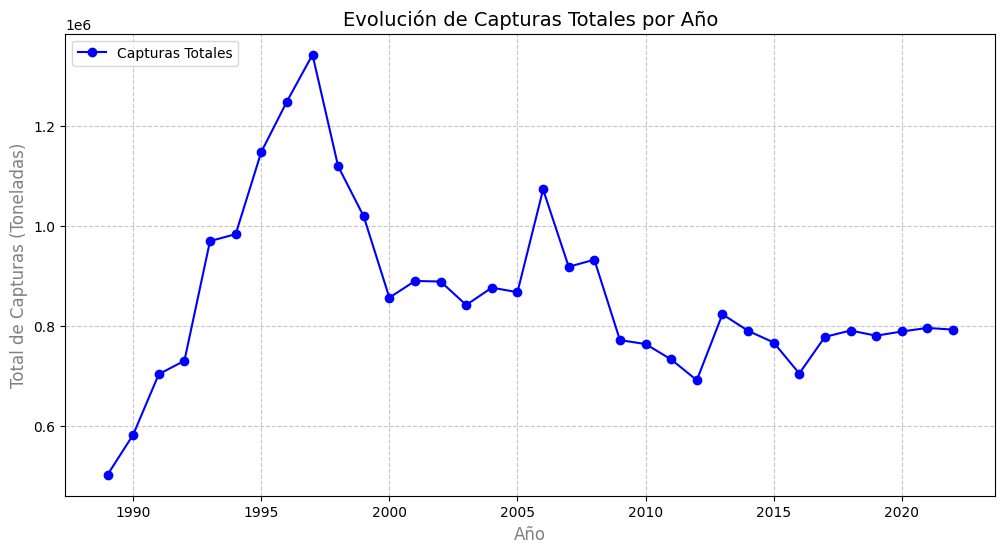

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(datos_desembarques['Año'], datos_desembarques['Total'], marker='o', linestyle='-', color='b', label='Capturas Totales')
plt.xlabel('Año', fontsize=12, color='gray')
plt.ylabel('Total de Capturas (Toneladas)', fontsize=12, color='gray')
plt.title('Evolución de Capturas Totales por Año', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tick_params(axis='both', which='both', labelsize=10, colors='black')
plt.show()
